# Real-time Election Results: Portugal 2019 Data Set(Projects Dynamics M20 -19)



In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import scipy
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [42]:
data=pd.read_csv('election.csv',parse_dates=['time'])
data
# this data set describing the evolution of results in the Portuguese Parliamentary Elections of October 6th 2019.
# The data spans a time interval of 4 hours and 25 minutes, in intervals of 5 minutes, concerning the results of the 27 parties involved in the electoral event.
# The data set is tailored for predictive modelling tasks, mostly focused on numerical forecasting tasks.

# Attribute Information:
# TimeElapsed (Numeric): Time (minutes) passed since the first data acquisition
# time (timestamp): Date and time of the data acquisition
# territoryName (string): Short name of the location (district or nation-wide)
# totalMandates (numeric): MP's elected at the moment
# availableMandates (numeric): MP's left to elect at the moment
# numParishes (numeric): Total number of parishes in this location
# numParishesApproved (numeric): Number of parishes approved in this location
# blankVotes (numeric): Number of blank votes
# blankVotesPercentage (numeric): Percentage of blank votes
# nullVotes (numeric): Number of null votes
# nullVotesPercentage (numeric): Percentage of null votes
# votersPercentage (numeric): Percentage of voters
# subscribedVoters (numeric): Number of subscribed voters in the location
# # totalVoters (numeric): Percentage of blank votes
# pre.blankVotes (numeric): Number of blank votes (previous election)
# pre.blankVotesPercentage (numeric): Percentage of blank votes (previous election)
# pre.nullVotes (numeric): Number of null votes (previous election)
# pre.nullVotesPercentage (numeric): Percentage of null votes (previous election)
# pre.votersPercentage (numeric): Percentage of voters (previous election)
# pre.subscribedVoters (numeric): Number of subscribed voters in the location (previous election)
# pre.totalVoters (numeric): Percentage of blank votes (previous election)
# Party (string): Political Party
# Mandates (numeric): MP's elected at the moment for the party in a given district
# Percentage (numeric): Percentage of votes in a party
# validVotesPercentage (numeric): Percentage of valid votes in a party
# Votes (numeric): Percentage of party votes
# Hondt (numeric): Number of MP's according to the distribution of votes now
# FinalMandates (numeric): Target: final number of elected MP's in a district/national-level



,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:00,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:00,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:00,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:00,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:00,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:00,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:00,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:00,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:00,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


In [43]:
df=pd.DataFrame(data=data)
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:00,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:00,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:00,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:00,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:00,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


# EDA

In [44]:
df.info() # No Null values # datatype -> 2 object, 25 numberical & 1 datetimestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TimeElapsed               21643 non-null  int64         
 1   time                      21643 non-null  datetime64[ns]
 2   territoryName             21643 non-null  object        
 3   totalMandates             21643 non-null  int64         
 4   availableMandates         21643 non-null  int64         
 5   numParishes               21643 non-null  int64         
 6   numParishesApproved       21643 non-null  int64         
 7   blankVotes                21643 non-null  int64         
 8   blankVotesPercentage      21643 non-null  float64       
 9   nullVotes                 21643 non-null  int64         
 10  nullVotesPercentage       21643 non-null  float64       
 11  votersPercentage          21643 non-null  float64       
 12  subscribedVoters  

In [45]:
df1=df.copy() # takimng copy of the original dataset
df1.columns # lets check the columns involved

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [46]:
df1['territoryName'].unique() ## checking name all territories where election is taking place

array(['Território Nacional', 'Aveiro', 'Beja', 'Braga', 'Bragança',
       'Castelo Branco', 'Coimbra', 'Évora', 'Faro', 'Guarda', 'Leiria',
       'Lisboa', 'Madeira', 'Portalegre', 'Porto', 'Santarém', 'Setúbal',
       'Viana do Castelo', 'Vila Real', 'Viseu', 'Açores'], dtype=object)

In [47]:
df1['Party'].unique() ## checking the name of all parties conetsting in the election

array(['PS', 'PPD/PSD', 'B.E.', 'CDS-PP', 'PCP-PEV', 'PAN', 'CH',
       'R.I.R.', 'PCTP/MRPP', 'A', 'L', 'IL', 'JPP', 'NC', 'PDR', 'PNR',
       'PURP', 'PPM', 'MPT', 'PTP', 'MAS'], dtype=object)

In [48]:
le=LabelEncoder()
df1['territoryName']=le.fit_transform(df1['territoryName'])
for i in df1['territoryName'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))
df1['Party']=le.fit_transform(df1['Party'])

16=['Território Nacional']
0=['Aveiro']
2=['Beja']
3=['Braga']
4=['Bragança']
5=['Castelo Branco']
6=['Coimbra']
20=['Évora']
7=['Faro']
8=['Guarda']
9=['Leiria']
10=['Lisboa']
11=['Madeira']
12=['Portalegre']
13=['Porto']
14=['Santarém']
15=['Setúbal']
17=['Viana do Castelo']
18=['Vila Real']
19=['Viseu']
1=['Açores']


In [49]:
# election happened on single day. So we can drop the 'time' column. 

# Univariate & Bivariate Analysis

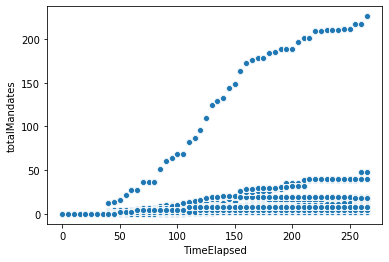

In [50]:
sns.scatterplot(data=df1, x='TimeElapsed',y='totalMandates')
# so we can observe, as the time progressed, number of elected MPs consistantly gone up

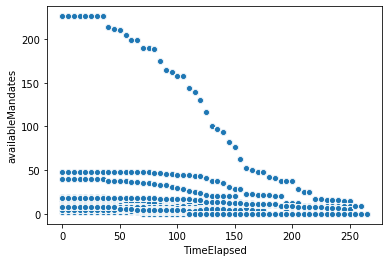

In [51]:
sns.scatterplot(data=df1, x='TimeElapsed',y='availableMandates')
# so we can observe, as the time progressed, number of MPs yet to elected consistantly gone down

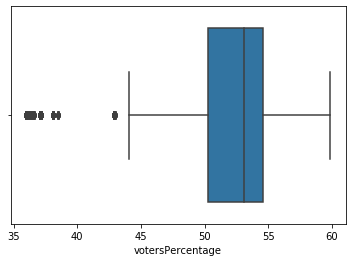

In [52]:
sns.boxplot(x='votersPercentage',data=df1)
# we can observe voter's percentage grossly remained between 50-55% in most of the territories

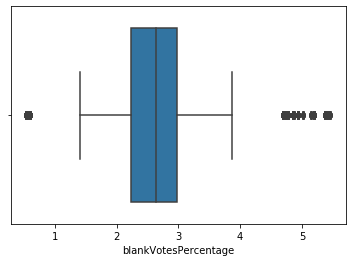

In [53]:
sns.boxplot(x='blankVotesPercentage',data=df1)# we can see blankvotes percentage lies mostly between 2-3%

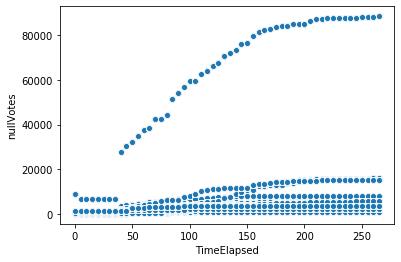

In [54]:
sns.scatterplot(data=df1, x='TimeElapsed',y='nullVotes')
# we can observe number of nullvotes has gone up as the time progressed

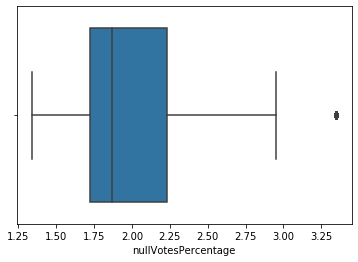

In [55]:
sns.boxplot(x='nullVotesPercentage',data=df1)# Nullvotespercentage lies between 1.75 to 2.25%

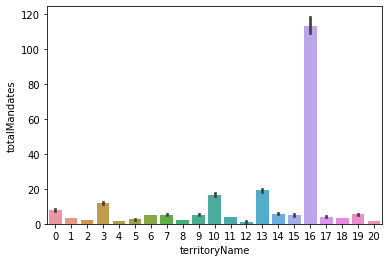

In [56]:
sns.barplot(x='territoryName',y='totalMandates',data=df1)
plt.show() # we can observe 'Território Nacional' has got higest number of elected MPs 

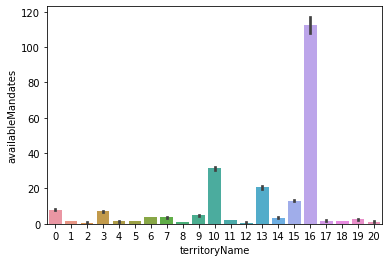

In [57]:
sns.barplot(x='territoryName',y='availableMandates',data=df1)
# we can see 'Territorio Nacional' has got higehst number of avuilable Mandates while 'Lisboa' & 'Porto' are distantly second and third in place 

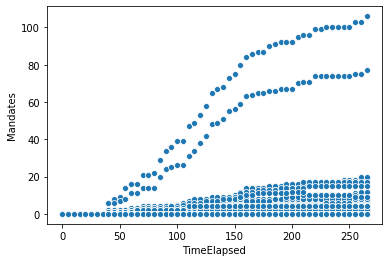

In [58]:
sns.scatterplot(data=df1, x='TimeElapsed',y='Mandates')
# so as the time progressed the total number of elected MPs of any party from a given district has gone up consistantly

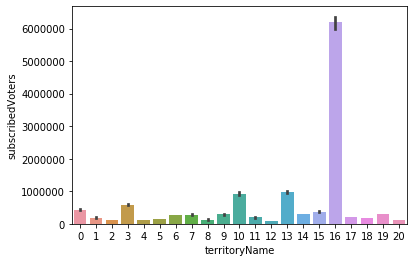

In [59]:
sns.barplot(x='territoryName',y='subscribedVoters',data=df1)
# we can see total number of subscribed voters are highest in 'Territorio Nacional'

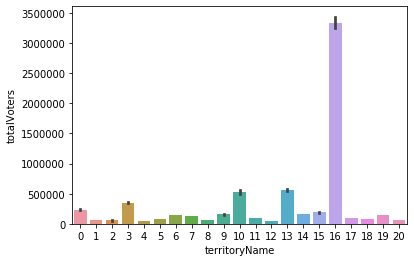

In [60]:
sns.barplot(x='territoryName',y='totalVoters',data=df1)
# we can see total number of voters are highest in 'Territorio Nacional'

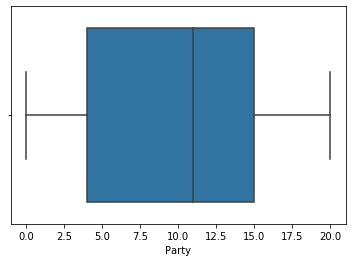

In [61]:
sns.boxplot(x='Party',data=df1)
# we can observe on average the number of parties contested election accross all the district is 10-11

In [62]:
df1.skew()

TimeElapsed                 -0.005496
territoryName               -0.025884
totalMandates                5.150031
availableMandates            5.131572
numParishes                  3.920433
numParishesApproved          4.238343
blankVotes                   4.521940
blankVotesPercentage         0.069627
nullVotes                    4.520945
nullVotesPercentage          0.855419
votersPercentage            -1.158029
subscribedVoters             4.568797
totalVoters                  4.541364
pre.blankVotes               4.551489
pre.blankVotesPercentage     0.021609
pre.nullVotes                4.563235
pre.nullVotesPercentage      1.231109
pre.votersPercentage        -0.779289
pre.subscribedVoters         4.565085
pre.totalVoters              4.548030
Party                       -0.083536
Mandates                    16.576658
Percentage                   2.542328
validVotesPercentage         2.543122
Votes                       13.940573
Hondt                       11.489315
FinalMandate

# Cleaning The Dataset for Model Training

In [63]:
df2=df1.drop('time',axis=1)
df2.head()

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,16,0,226,3092,1081,9652,2.5,8874,2.3,...,52.66,813743,428546,17,0,38.29,40.22,147993,94,106
1,0,16,0,226,3092,1081,9652,2.5,8874,2.3,...,52.66,813743,428546,15,0,33.28,34.95,128624,81,77
2,0,16,0,226,3092,1081,9652,2.5,8874,2.3,...,52.66,813743,428546,1,0,6.81,7.15,26307,16,19
3,0,16,0,226,3092,1081,9652,2.5,8874,2.3,...,52.66,813743,428546,2,0,4.90,5.14,18923,12,5
4,0,16,0,226,3092,1081,9652,2.5,8874,2.3,...,52.66,813743,428546,11,0,4.59,4.83,17757,11,12


In [64]:
z=np.abs(zscore(df2))
print(np.where(z>3))

(array([    0,     0,     0, ..., 21608, 21623, 21623], dtype=int64), array([ 3,  4, 22, ..., 23, 22, 23], dtype=int64))


In [65]:
df2n=df2[(z<3).all(axis=1)]
df2n.shape

(18333, 27)

In [66]:
df2n.skew()

TimeElapsed                -0.024110
territoryName               0.034073
totalMandates               2.542453
availableMandates           2.593527
numParishes                 0.585363
numParishesApproved         0.619329
blankVotes                  1.800122
blankVotesPercentage       -0.844508
nullVotes                   2.103352
nullVotesPercentage         0.564426
votersPercentage           -0.392023
subscribedVoters            2.407541
totalVoters                 2.468630
pre.blankVotes              2.034860
pre.blankVotesPercentage   -0.410446
pre.nullVotes               2.340000
pre.nullVotesPercentage     1.033803
pre.votersPercentage       -0.514215
pre.subscribedVoters        2.370988
pre.totalVoters             2.468950
Party                       0.009657
Mandates                    7.177093
Percentage                  3.373567
validVotesPercentage        3.383145
Votes                       7.310058
Hondt                       7.012845
FinalMandates               6.746120
d

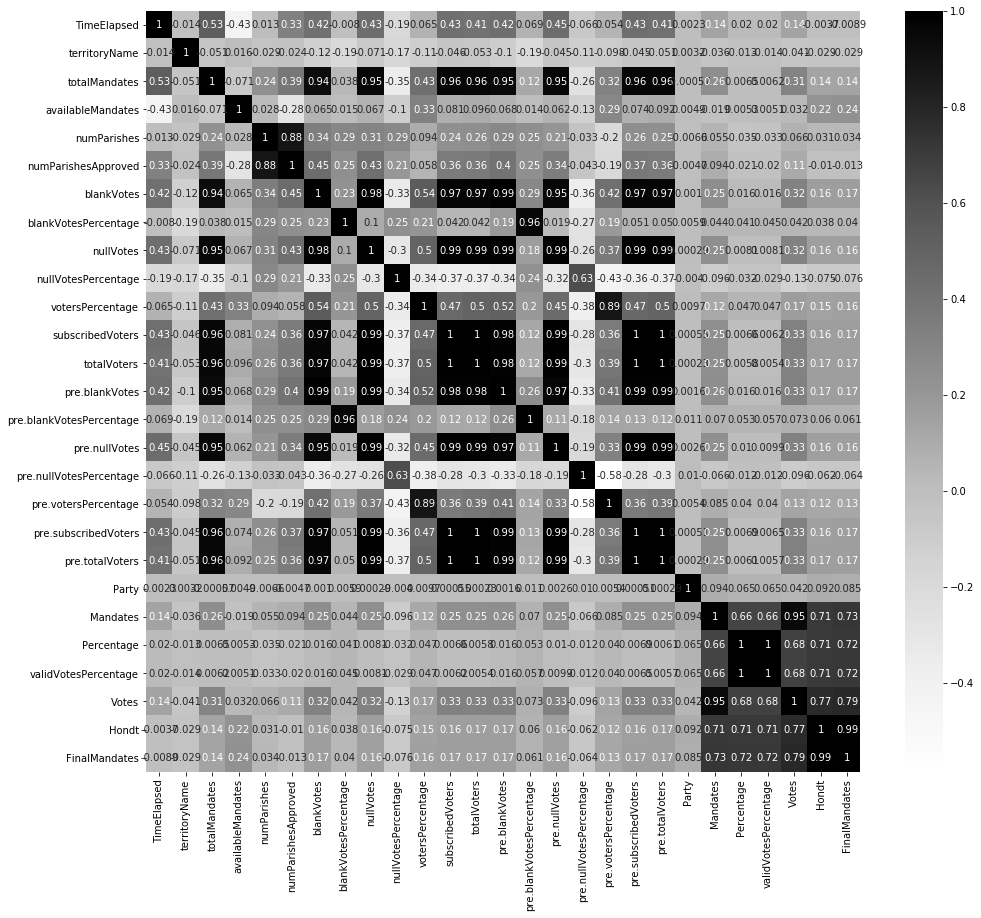

In [67]:
plt.figure(figsize=(16,14))
sns.heatmap(df2n.corr(),cmap='Greys',annot=True)

# Model Training through various algorithms

In [68]:
x=df2n.iloc[:,0:-1] # Feature columns
y=df2n.iloc[:,-1] # Target column
x.shape,y.shape

((18333, 26), (18333,))

In [69]:
sc=StandardScaler() # regularising the feature columns to avoid model underfitting/overfitting
x=sc.fit_transform(x)

In [70]:
xpca=PCA(n_components=10) # applying curse of dimensionality 
x=xpca.fit_transform(x)

Linear Regression 

In [71]:
maxr=0
for i in range(41,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    lm=LinearRegression(normalize=True)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    score=lm.score(x_train,y_train)
    print('Model score correspondng to random state',i,'is:',score)
    if score>maxr:
        maxr=score
        finalr=i
print()
print('maximum score corresponding to random state',finalr,'is',maxr)

Model score correspondng to random state 41 is: 0.8334236912913076
Model score correspondng to random state 42 is: 0.8147887715073351
Model score correspondng to random state 43 is: 0.8140941069047675
Model score correspondng to random state 44 is: 0.8096323474584605
Model score correspondng to random state 45 is: 0.8228415827395069
Model score correspondng to random state 46 is: 0.8288717303605129
Model score correspondng to random state 47 is: 0.8246543731682245
Model score correspondng to random state 48 is: 0.814403749857845
Model score correspondng to random state 49 is: 0.8081192765345095
Model score correspondng to random state 50 is: 0.8161540980057421
Model score correspondng to random state 51 is: 0.8202906733301043
Model score correspondng to random state 52 is: 0.81198247809429
Model score correspondng to random state 53 is: 0.8071630541391899
Model score correspondng to random state 54 is: 0.8196672028307158
Model score correspondng to random state 55 is: 0.823850689254109

Lets apply Lasso & Elasticnet to get better score

In [72]:
ls=Lasso()
alphavalue={'alpha':[0.0001,.001,.01,.1,1]}
grid=GridSearchCV(ls,param_grid=alphavalue)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.8230390686667388
{'alpha': 0.001}


In [73]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.8230938548215693

In [74]:
el=ElasticNet()
alphavalue={'alpha':[0.0001,.001,.01,.1,1]}
grid=GridSearchCV(el,param_grid=alphavalue)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.8230402689439188
{'alpha': 0.001}


In [75]:
el=ElasticNet(alpha=0.001)
el.fit(x_train,y_train)
el.score(x_train,y_train)

0.8230961867742034

Lets apply Support Vector Regressor 

In [76]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
scoresvr=svr.score(x_train,y_train)
predsvr=svr.predict(x_test)
print(scoresvr)

0.7449356683149104


Let's apply ensemble techniques to boost the score

In [77]:
rf=RandomForestRegressor(n_estimators=400,random_state=60)

In [78]:
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(rf.score(x_train,y_train))
print(pred)

0.9995744968229757
[0. 0. 0. ... 0. 0. 0.]


Save the Model 

In [79]:
joblib.dump(rf,'rfmandate.obj')

['rfmandate.obj']